In [29]:
from control import *
import numpy as np
import matplotlib.pyplot as plt

In [30]:
kp = 31.28054740957967
ki = 44.965786901270775
kd = 947.2140762463343

In [31]:
plant = tf([1], [64,9.6,0.48,0.008])
pid = tf([kd,kp,ki], [1,0])

In [32]:
sys1 = feedback(pid*plant, 1)

In [33]:
sys1d = sys1.sample(Ts=0.025, method='zoh', alpha=None)
sys1d


0.004617 z^3 - 0.004618 z^2 - 0.004608 z + 0.004609
---------------------------------------------------
    z^4 - 3.987 z^3 + 5.97 z^2 - 3.98 z + 0.9963

dt = 0.025

In [34]:
time = np.arange(0,100)

<function matplotlib.pyplot.show>

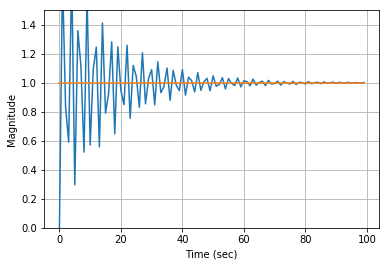

In [43]:
# PID compensated Step Response
t, z = step_response(sys1,T=time) # chage to sys1d to probe discrete domain
target = np.linspace(1, 1, num=len(t))
plt.figure()
# In continuos domain:
plt.plot(t,z,t,target)
# In discrete domain:
#plt.plot(z[0])
plt.ylim([0,1.5])
plt.ylabel(r'Magnitude')
plt.xlabel(r'Time (sec)')
plt.grid()
plt.show

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
x = pd.read_excel('motor.xlsx')

In [79]:
#x = x.drop(x.index[40006:50005])
x

,time,input,output
0,0.2,0,0
1,0.4,0,0
2,0.6,0,0
3,0.8,0,0
4,1.0,0,0
5,1.2,0,0
6,1.4,0,0
7,1.6,0,0
8,1.8,0,0
9,2.0,0,0


In [80]:
t = np.array((x['time']))

In [81]:
#posW = np.array((x['output']))
#pwmW = np.array((x['input']))

In [82]:
#x['input'] = pwmW
#x['output'] = posW

In [83]:
len(x)

6986

In [84]:
x

,time,input,output
0,0.2,0,0
1,0.4,0,0
2,0.6,0,0
3,0.8,0,0
4,1.0,0,0
5,1.2,0,0
6,1.4,0,0
7,1.6,0,0
8,1.8,0,0
9,2.0,0,0


In [85]:
#x = pd.read_excel('antihorario.xlsx')

#d = {'time': np.arange(10), 'pwm': np.arange(10), 'antihorapos': np.arange(10)}
#x = pd.DataFrame(data=d)

q1 = pd.DataFrame()
q1['input1'] = pd.Series(x['input'], index=x.index)
q1['y1'] = pd.Series(x['output'], index=x.index)
q1 = q1.shift(periods=-1, freq=None, axis=0)
#q1 = q1.drop(q1.index[0])

x['input1'] = pd.Series(q1['input1'], index=x.index)
x['y1'] = pd.Series(q1['y1'], index=x.index)

q2 = pd.DataFrame()
q2['input2'] = pd.Series(x['input'], index=x.index)
q2['y2'] = pd.Series(x['output'], index=x.index)
q2 = q2.shift(periods=-2, freq=None, axis=0)
#q2 = q2.drop(q2.index[0:2])

x['input2'] = pd.Series(q2['input2'], index=x.index)
x['y2'] = pd.Series(q2['y2'], index=x.index)

q3 = pd.DataFrame()
q3['input3'] = pd.Series(x['input'], index=x.index)
q3['y3'] = pd.Series(x['output'], index=x.index)
q3 = q3.shift(periods=-3, freq=None, axis=0)

x['input3'] = pd.Series(q3['input3'], index=x.index)
x['y3'] = pd.Series(q3['y3'], index=x.index)

q4 = pd.DataFrame()
q4['input4'] = pd.Series(x['input'], index=x.index)
q4['y4'] = pd.Series(x['output'], index=x.index)
q4 = q4.shift(periods=-4, freq=None, axis=0)

x['input4'] = pd.Series(q4['input4'], index=x.index)
x['y4'] = pd.Series(q4['y4'], index=x.index)

'''
q5 = pd.DataFrame()
q5['input5'] = pd.Series(x['input'], index=x.index)
q5['y5'] = pd.Series(x['output'], index=x.index)
q5 = q5.shift(periods=-5, freq=None, axis=0)

x['input5'] = pd.Series(q5['input5'], index=x.index)
x['y5'] = pd.Series(q5['y5'], index=x.index)
'''

x = x.drop(x.index[6983:6986])

#y = x['antihorapos']
y = pd.DataFrame()
y['output'] = x['output']

x = x.drop('output', axis=1)
x = x.drop('time', axis=1)

In [86]:
x

,input,input1,y1,input2,y2,input3,y3
0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [88]:
from sklearn.linear_model import Lasso
model = Lasso()

In [89]:
model.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [90]:
model.score(x_test,y_test)

0.989081022200996

In [91]:
y_test

,output
6882,0
4313,6
4087,0
5637,16
4222,0
2178,19
5255,0
4517,5
5701,24
4677,21


In [92]:
predicted = model.predict(x_test)

In [93]:
predicted.shape

(2794,)

In [94]:
y_test;

([array([1023.,   95.,   97.,  159.,  155.,  196.,  337.,  417.,  299.,
           16.]),
  array([1035.,   82.,   94.,  162.,  153.,  189.,  322.,  318.,  420.,
           19.])],
 array([-0.5469276 ,  2.50776516,  5.56245792,  8.61715068, 11.67184344,
        14.7265362 , 17.78122896, 20.83592172, 23.89061448, 26.94530724,
        30.        ]),
 <a list of 2 Lists of Patches objects>)

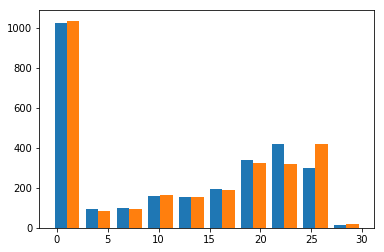

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([predicted, y_test['output']])

In [702]:
residuals = y_test['output'] - predicted

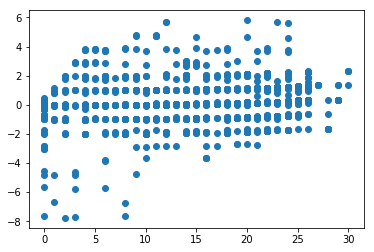

In [703]:
plt.scatter(y_test,residuals)

In [704]:
ap_residuals = np.abs(residuals) / y_test['output']
min(y_test['output'])

0

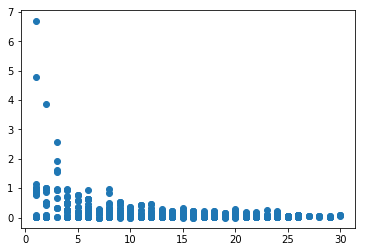

In [705]:
plt.scatter(y_test,ap_residuals)

In [706]:
lap_residuals = np.log(ap_residuals)

In [707]:
lap_residuals

5610   -2.377275
2168   -5.148456
6064   -2.998547
3743   -2.994592
3101   -4.828614
1949         inf
2039   -3.386447
350    -2.498501
11           inf
1319         inf
5740   -4.439698
1968         inf
5808   -4.687805
4338         inf
6561   -4.450312
5553         inf
719          inf
3976   -3.414633
3344   -3.746107
5460   -6.766724
6090         inf
515    -1.547934
6626   -2.946046
5801         inf
967          inf
2605   -0.258579
4943   -2.597925
4815   -4.750114
1603   -4.329822
1175   -9.555353
          ...   
411    -2.298696
5557         inf
1180   -2.196517
1137   -6.039773
2483         inf
2955         inf
1741   -5.019787
5103   -2.991004
1580   -2.592316
6866         inf
2288   -5.693781
6153   -2.998318
4751   -6.555861
4051   -2.384112
1026         inf
3746   -2.994592
5686   -4.408515
6265         inf
1152   -6.361397
1998   -2.511117
1471   -6.171723
2495         inf
1857         inf
5118   -2.848026
6134   -2.388515
3860         inf
5467   -8.570394
3974   -4.4718

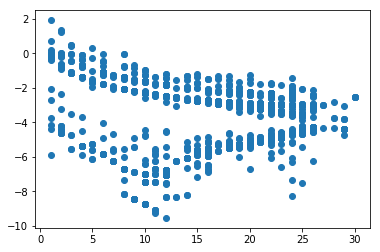

In [675]:
plt.scatter(y_test,lap_residuals)

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


ValueError: range parameter must be finite.

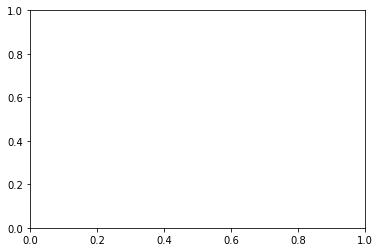

In [628]:
plt.hist(ap_residuals, bins=100, normed=1, histtype='step', cumulative=True);

In [585]:
np.fft.fft([0])

array([0.+0.j])

In [35]:
def pidController(kp, ki, kd, dt, n, pid1, error0, error1, error2):
    q1 = kp + 0.5*dt*ki + (kd/dt)
    q2 = dt*ki*0.5 - kp - (2*kd/dt)
    q3 = kd/dt

    pid0 = pid1 + q1 * error0 + q2 * error1 + q3 * error2

    pid1 = pid0
    error1 = error0
    error2 = error1
    
    if (pid0 > 255):
        pid0 = 255
    elif (pid0 < 255):
        pid0 = -255
    else:
        pid0 = pid0
    
    d = {'pwm': [pid0], 'time': [dt * n]}
    
    
    return [d, pid0, pid1, error1, error2]

In [36]:
complex(1,2)

(1+2j)

In [639]:
def evaluatePID(kp, ki, kd, Ts, setPoint):
    #error = 0
    
    pid1 = 0
    pid2 = 0
    pid3 = 0
    pid4 = 0
    error0 = 0
    error1 = 0
    error2 = 0
    y1 = 0
    y2 = 0
    y3 = 0
    y4 = 0
    
    E = []

    for k in np.arange(1000):
    #while error < 900000
        #d, pid0, pid1, error1, error2  = pidController(kp, ki, kd, 0.025, k, pid1, error0, error1, error2)
        
        q1 = kp + 0.5 * Ts * ki + (kd / Ts)
        q2 = Ts * ki * 0.5 - kp - (2 * kd / Ts)
        q3 = kd / Ts

        pid0 = pid1 + q1 * error0 + q2 * error1 + q3 * error2

        pid4 = pid3
        pid3 = pid2
        pid2 = pid1
        pid1 = pid0
        error1 = error0
        error2 = error1
        
        if (pid0 > 255):
            pid0 = 255
        elif (pid0 < 70): #-255):
            pid0 = 0 #-255
        else:
            pid0 = pid0
        
        #d = {'pwm': [pid0], 'pwm1': [pid1], 'y1': [y1], 'pwm2': [pid2], 'y2': [y2]}
        d = {'pwm': [pid0], 'pwm1': [pid1], 'y1': [y1], 'pwm2': [pid2], 'y2': [y2], 'pwm3': [pid3], 'y3': [y3], 'pwm4': [pid4], 'y4': [y4]}

        _y = model.predict(pd.DataFrame(data=d))

        y = _y[0]
        
        if (y > 610): #1023):
            y = 610 #1023
        elif (y < 0): #30):
            y = 0# 30
        else:
            y = y
            
        y1 = y
        y2 = y1
        
        error0 = setPoint - y
        E.append(pid0)

        print(pid0)
        #print([d, y, pid0, pid1, error1, error2])
    
    return E

In [640]:
kp = 0
ki = 0.9775171065493646
kd = 0
P = evaluatePID(kp, ki, kd, 0.1, 800)

ValueError: shapes (1,9) and (7,) not aligned: 9 (dim 1) != 7 (dim 0)

In [641]:
#evaluatePID(kp, ki, kd, 1)

<function matplotlib.pyplot.show>

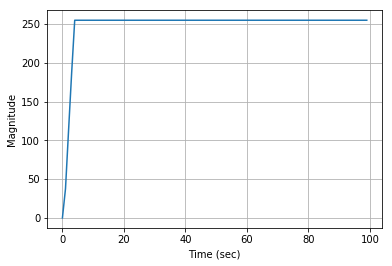

In [149]:
plt.figure()
plt.plot(P[0:100])
#plt.ylim([0,1.5])
plt.ylabel(r'Magnitude')
plt.xlabel(r'Time (sec)')
plt.grid()
plt.show

In [708]:
from deap import base, creator
# Crear clase FITNESS: ( Nombre de la clase, Delegando la clase como fitness, Posibles valores min y max del fitness )
creator.create("ControllerFitness", base.Fitness, weights=(-1.0,))

# Crear clase CROMOSOMA: ( Nombre de la clase, type de los valores de la clase, Establecer fitness con la clase anterior )
creator.create("Controller", list, fitness=creator.ControllerFitness)

/usr/local/lib/python3.5/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'ControllerFitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.5/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Controller' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [709]:
import random
from deap import tools

IND_SIZE = 30 # ki bits + kp bits + kd bits

# Functions to initialize populations from individuals

toolbox = base.Toolbox()

# Crear el ATRIBUTO de cromosomas ( Nombre del registro para el toolbox, Función para crear un cromosoma aleatorio )
toolbox.register("bit_attribute", random.randint, 0, 1) # random.choice, '10')

# Crear el CROMOSOMA ( Nombre del registro, , La clase cromosoma, La clase atributo, Tamaño de la población )
# Cuando se llame a toolbox.individual(), este llamará a tool.initRepeat()
toolbox.register("controller", tools.initRepeat, creator.Controller, toolbox.bit_attribute, n=IND_SIZE)

# Crear la POBLACIÓN ( Nombre del registro, , Type del cromosoma, El cromosoma )
toolbox.register("population", tools.initRepeat, list, toolbox.controller)

In [718]:
def evaluate(controller):
    controller = ''.join(map(str,controller))
    
    # PID controller
    _kp = int(controller[0:10],2)
    _ki = int(controller[10:20],2)
    _kd = int(controller[20:30],2)
    
    kp = 0 + _kp * ( (1000 - 0) / (pow(2,10) - 1) )
    ki = 0 + _ki * ( (1000 - 0) / (pow(2,10) - 1) )
    kd = 0 + _kd * ( (1000 - 0) / (pow(2,10) - 1) )
    
    # =====================================================================================================
    pid1 = 0
    pid2 = 0
    pid3 = 0
    pid4 = 0
    error0 = 0
    error1 = 0
    error2 = 0
    y1 = 0
    y2 = 0
    y3 = 0
    y4 = 0
    
    E = []

    setPoint = 20 #800
    Ts = 0.1
    
    for k in np.arange(1000):      
        q1 = kp + 0.5 * Ts * ki + (kd / Ts)
        q2 = Ts * ki * 0.5 - kp - (2 * kd / Ts)
        q3 = kd / Ts

        pid0 = pid1 + q1 * error0 + q2 * error1 + q3 * error2

        pid4 = pid3
        pid3 = pid2
        pid2 = pid1
        pid1 = pid0
        error1 = error0
        error2 = error1
        
        if (pid0 > 255):
            pid0 = 255
        elif (pid0 < 0):
            pid0 = 0
        else:
            pid0 = pid0
        
        #d = {'pwm': [pid0], 'pwm1': [pid1], 'y1': [y1], 'pwm2': [pid2], 'y2': [y2]}
        d = {'pwm': [pid0], 'pwm1': [pid1], 'y1': [y1], 'pwm2': [pid2], 'y2': [y2], 'pwm3': [pid3], 'y3': [y3]}#, 'pwm4': [pid4], 'y4': [y4]}

        _y = model.predict(pd.DataFrame(data=d))

        y = _y[0]
        
        if (y > 30): #1023):
            y = 30 #1023
        elif (y < 0): #30):
            y = 0 #30
        else:
            y = y
            
        y1 = y
        y2 = y1
        y3 = y2
        y4 = y3
        
        error0 = setPoint - y
        E.append(error0)
    
    total_error = sum(map(abs, E))
    
    print([total_error])
    
    return (total_error),

In [719]:
w = [1,2,3,-6]
w = sum(map(abs, w))
w

12

In [720]:
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

In [721]:
def main():
    pop = toolbox.population(n=40)
    # pop[0:100] = prev
    CXPB, MUTPB, NGEN = 0.7, 0.1, 40

    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit

    minFit = (1,)
    #while minFit > (0.02,):
    for g in range(NGEN):
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = list(map(toolbox.evaluate, invalid_ind))
        minFit = min(fitnesses)
        print("=START=================================================================")
        print(fitnesses)
        print("=END===================================================================")
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # The population is entirely replaced by the offspring
        pop[:] = offspring
    
    
    return pop

In [722]:
kx = main()

[13389.68483135894]
[14596.542189707412]
[13619.68483135894]
[14158.15229158182]
[13459.68483135894]
[13439.68483135894]
[13559.68483135894]
[13549.68483135894]
[14999.68483135894]
[14399.68483135894]
[13459.68483135894]
[13539.68483135894]
[13779.68483135894]
[13599.68483135894]
[13439.68483135894]
[13449.68483135894]
[13619.68483135894]
[13499.68483135894]
[13379.68483135894]
[13399.68483135894]
[13599.68483135894]
[13737.317327897861]
[13879.68483135894]
[14079.68483135894]
[13519.68483135894]
[13679.68483135894]
[13579.68483135894]
[13419.68483135894]
[14359.68483135894]
[13726.342930450439]
[13979.68483135894]
[13799.68483135894]
[13669.68483135894]
[13869.68483135894]
[13399.68483135894]
[13699.68483135894]
[13479.68483135894]
[13679.68483135894]
[13619.68483135894]
[13529.68483135894]
[13594.243974090772]
[13681.857610308012]
[13399.68483135894]
[13439.68483135894]
[13448.420769414559]
[13539.68483135894]
[13780.095788711153]
[13689.68483135894]
[13439.68483135894]
[13419.684831

[13359.68483135894]
[13359.68483135894]
[13339.68483135894]
[13359.68483135894]
[13339.68483135894]
[13339.68483135894]
[13339.68483135894]
[13359.68483135894]
[13359.68483135894]
[13359.68483135894]
[13339.68483135894]
[13339.68483135894]
[13339.68483135894]
[13339.68483135894]
[13339.68483135894]
[13339.68483135894]
[13359.68483135894]
=START=================================================================
[(13359.68483135894,), (13359.68483135894,), (13339.68483135894,), (13359.68483135894,), (13339.68483135894,), (13339.68483135894,), (13339.68483135894,), (13359.68483135894,), (13359.68483135894,), (13359.68483135894,), (13339.68483135894,), (13339.68483135894,), (13339.68483135894,), (13339.68483135894,), (13339.68483135894,), (13339.68483135894,), (13359.68483135894,)]
=END===================================================================
[13359.68483135894]
[13339.68483135894]
[13339.68483135894]
[13331.00564637408]
[13359.68483135894]
[13339.68483135894]
[13339.68483135894]
[

[13331.00564637408]
[13331.00564637408]
[13331.00564637408]
[13331.00564637408]
[13339.68483135894]
[13339.68483135894]
[13339.68483135894]
[13339.68483135894]
[13339.68483135894]
[13339.68483135894]
[13339.68483135894]
[13331.00564637408]
[13326.558930913108]
[13339.68483135894]
[13339.68483135894]
[13331.00564637408]
[13331.00564637408]
[13331.00564637408]
[13339.68483135894]
[13339.68483135894]
[13330.570261988752]
[13339.68483135894]
=START=================================================================
[(13339.68483135894,), (13326.558930913108,), (13339.68483135894,), (13339.68483135894,), (13331.00564637408,), (13331.00564637408,), (13339.68483135894,), (13339.68483135894,), (13339.68483135894,), (13339.68483135894,), (13331.00564637408,), (13331.00564637408,), (13331.00564637408,), (13331.00564637408,), (13331.00564637408,), (13339.68483135894,), (13339.68483135894,), (13339.68483135894,), (13339.68483135894,), (13339.68483135894,), (13339.68483135894,), (13339.68483135894,), 

[13326.558930913108]
[13339.68483135894]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13339.68483135894]
[13339.68483135894]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13439.68483135894]
[13326.558930913108]
=START=================================================================
[(13326.558930913108,), (13339.68483135894,), (13326.558930913108,), (13326.558930913108,), (13326.558930913108,), (13326.558930913108,), (13326.558930913108,), (13326.558930913108,), (13339.68483135894,), (13339.68483135894,), (13326.558930913108,), (13326.558930913108,), (13326.558930913108,), (1332

[13326.558930913108]
[13349.68483135894]
[13326.558930913108]
[13339.68483135894]
[13326.558930913108]
[13326.558930913108]
[13339.68483135894]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13439.68483135894]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
=START=================================================================
[(13326.558930913108,), (13326.558930913108,), (13349.68483135894,), (13326.558930913108,), (13349.68483135894,), (13326.558930913108,), (13339.68483135894,), (13326.558930913108,), (13326.558930913108,), (13339.68483135894,), (13326.558930913108,), (13326.558930913108,), (13326.558930913108,), (13326.558930913108,), (13439.68483135894,), (13

[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
=START=================================================================
[(13326.558930913108,), (13326.558930913108,), (13326.558930913108,), (13326.558930913108,), (13326.558930913108,), (13326.558930913108,), (13326.558930913108,), (13326.558930913108,), (13339.68483135894,), (13326.558930913108,), (13326.558930913108,), (13326.558930913108,), (13326.558930913108,), (13326.558930913108,), (13326.558930913108,), (13326.558930913108,), (13326.558930913108,), (13326.558930913108,), (13326.558930913108,), (13326.558930913108,), (13326.558930913108,), (13326.558930913108,), (13326.558930913108,), (13326.558930913108,), (13326.558930913108,)]
=END===================================================================
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13326.558930913108]
[13336.248353439285]
[13326.558930913108]
[13439.68483135894]
[13326.55

[13321.71421965002]
[13321.71421965002]
[13321.71421965002]
[13326.558930913108]
[13321.71421965002]
[13321.71421965002]
[13326.558930913108]
[13321.71421965002]
[13321.71421965002]
[13321.71421965002]
[13326.558930913108]
[13321.71421965002]
[13339.68483135894]
[13321.71421965002]
[13326.558930913108]
[13321.71421965002]
[13321.71421965002]
[13321.71421965002]
[13321.71421965002]
[13339.68483135894]
[13321.71421965002]
[13321.71421965002]
[13321.71421965002]
[13321.71421965002]
[13321.71421965002]
[13321.71421965002]
[13321.71421965002]
[13321.71421965002]
[13321.71421965002]
[13321.71421965002]
[13321.71421965002]
=START=================================================================
[(13321.71421965002,), (13321.71421965002,), (13321.71421965002,), (13326.558930913108,), (13321.71421965002,), (13321.71421965002,), (13326.558930913108,), (13321.71421965002,), (13321.71421965002,), (13321.71421965002,), (13326.558930913108,), (13321.71421965002,), (13339.68483135894,), (13321.7142196

In [723]:
for bits in kx:
    controller = ''.join(map(str,bits))
    
    # PID controller
    _kp = int(controller[0:10],2)
    _ki = int(controller[10:20],2)
    _kd = int(controller[20:30],2)
    
    kp = 0 + _kp * ( (1000 - 0) / (pow(2,10) - 1) )
    ki = 0 + _ki * ( (1000 - 0) / (pow(2,10) - 1) )
    kd = 0 + _kd * ( (1000 - 0) / (pow(2,10) - 1) )
    
    print([_kp,_ki,_kd,kp,ki,kd])

[183, 910, 4, 178.88563049853371, 889.5405669599218, 3.9100684261974585]
[183, 910, 4, 178.88563049853371, 889.5405669599218, 3.9100684261974585]
[183, 910, 4, 178.88563049853371, 889.5405669599218, 3.9100684261974585]
[183, 910, 4, 178.88563049853371, 889.5405669599218, 3.9100684261974585]
[183, 910, 4, 178.88563049853371, 889.5405669599218, 3.9100684261974585]
[183, 910, 4, 178.88563049853371, 889.5405669599218, 3.9100684261974585]
[183, 910, 4, 178.88563049853371, 889.5405669599218, 3.9100684261974585]
[183, 910, 4, 178.88563049853371, 889.5405669599218, 3.9100684261974585]
[183, 910, 4, 178.88563049853371, 889.5405669599218, 3.9100684261974585]
[183, 910, 4, 178.88563049853371, 889.5405669599218, 3.9100684261974585]
[167, 910, 4, 163.2453567937439, 889.5405669599218, 3.9100684261974585]
[183, 910, 4, 178.88563049853371, 889.5405669599218, 3.9100684261974585]
[183, 910, 4, 178.88563049853371, 889.5405669599218, 3.9100684261974585]
[183, 910, 4, 178.88563049853371, 889.5405669599218,

In [726]:
evaluate(kx[1])

[13321.71421965002]


(13321.71421965002,)

In [727]:
controller = ''.join(map(str,kx[1]))
    
# PID controller
_kp = int(controller[0:10],2)
_ki = int(controller[10:20],2)
_kd = int(controller[20:30],2)

kp = 0 + _kp * ( (1000 - 0) / (pow(2,10) - 1) )
ki = 0 + _ki * ( (1000 - 0) / (pow(2,10) - 1) )
kd = 0 + _kd * ( (1000 - 0) / (pow(2,10) - 1) )
    
print([_kp,_ki,_kd,kp,ki,kd])

[183, 910, 4, 178.88563049853371, 889.5405669599218, 3.9100684261974585]
